## Importing required python Libraries

- the libraries include pandas, matplotlib, sqlalchemy ....

In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import psycopg2 as pg




## Data Loading 
- connect to postgress
- read the database and convert to dataframe 

In [3]:
# connection to postgres database 
engine = pg.connect("dbname='telecomdb' user='postgres' host='127.0.0.1' port='5432' password='postgresP@ss'")
df = pd.read_sql('select * from xdr_data', con=engine)

# display the dimension of the dataframe
print(df.shape)
df.head()

C:\Users\Diriba\AppData\Local\Temp\ipykernel_15536\3212664855.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('select * from xdr_data', con=engine)


(150001, 55)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## Print concise summary of a dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

#### the data contains 55 columns with datetime, float and string data type.

## Data Cleaning



#### missing value

In [5]:
#missing values in percetage

missing_percentage = df.isnull().mean() * 100

# Create a DataFrame to display the results
missing_df = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
print(missing_df)

                                      Column  Missing Percentage
0                                  Bearer Id            0.660662
1                                      Start            0.000667
2                                   Start ms            0.000667
3                                        End            0.000667
4                                     End ms            0.000667
5                                  Dur. (ms)            0.000667
6                                       IMSI            0.379997
7                              MSISDN/Number            0.710662
8                                       IMEI            0.381331
9                         Last Location Name            0.768662
10                           Avg RTT DL (ms)           18.552543
11                           Avg RTT UL (ms)           18.541210
12                   Avg Bearer TP DL (kbps)            0.000667
13                   Avg Bearer TP UL (kbps)            0.000667
14               TCP DL R

In [16]:
# identifying the columns to be droped, with missing values greater than 50%
columns_to_drop = list(missing_df[missing_df["Missing Percentage"]>=50].Column.values)
columns_to_drop

['TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B']

- We drop the column with a percentage missing count of greater than 50%

In [17]:
# Drop multiple columns with more than 50% missing value
df = df.drop(columns_to_drop, axis=1)

#print missing value after columns dropped
missing_percentage = df.isnull().mean() * 100

# Create a DataFrame to display the results
missing_df = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
print(missing_df)


                            Column  Missing Percentage
0                        Bearer Id            0.660662
1                            Start            0.000667
2                         Start ms            0.000667
3                              End            0.000667
4                           End ms            0.000667
5                        Dur. (ms)            0.000667
6                             IMSI            0.379997
7                    MSISDN/Number            0.710662
8                             IMEI            0.381331
9               Last Location Name            0.768662
10                 Avg RTT DL (ms)           18.552543
11                 Avg RTT UL (ms)           18.541210
12         Avg Bearer TP DL (kbps)            0.000667
13         Avg Bearer TP UL (kbps)            0.000667
14             DL TP < 50 Kbps (%)            0.502663
15  50 Kbps < DL TP < 250 Kbps (%)            0.502663
16   250 Kbps < DL TP < 1 Mbps (%)            0.502663
17        

#### convert the data type of 'IMEI', 'IMSI', 'MSISDN/Number' to string data type

#### Generate descriptive statistics 

In [18]:

df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


## Check for duplicate columns

In [ ]:
# Check for duplicate columns
duplicate_columns = df.columns[df.columns.duplicated()]

if len(duplicate_columns) > 0:
    print("Duplicate columns found:", duplicate_columns)
else:
    print("No duplicate columns found")


No duplicate columns found


## check for duplicate rows

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found. Sample duplicates:")
    print(duplicate_rows.head())
else:
    print("No duplicate rows found")


No duplicate rows found


#### finally save the cleaned dataframe to csv file

In [21]:
df.to_csv('../data/clean_data.csv',index=False)

df_clean = pd.read_csv('../data/clean_data.csv')
df_clean.shape

(150001, 45)

### User Overview analysis 
 - identifying the top 10 handsets used by the customers.
 - identify the top 3 handset manufacturers
  - identify the top 5 handsets per top 3 handset manufacturer
- Make a short interpretation and recommendation to marketing teams


<Axes: xlabel='Handset Type'>

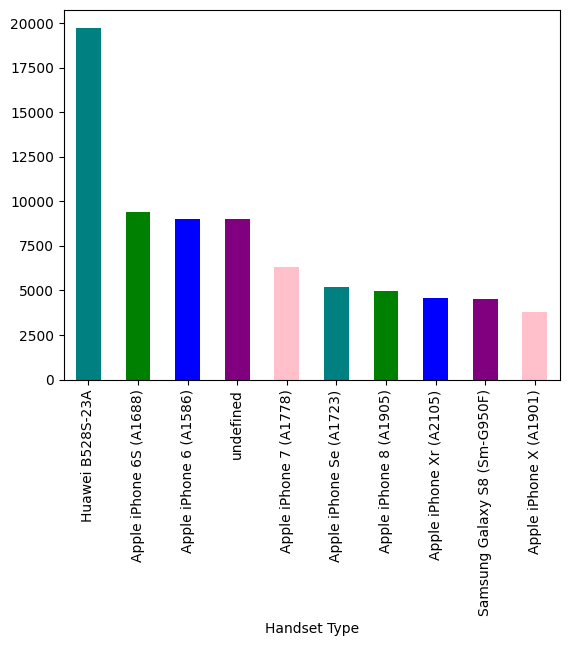

In [ ]:
# top 10 handsets used by the customers
top_handsets = df['Handset Type'].value_counts().head(10)
top_handsets[:10].plot(kind='bar', color=['teal', 'green', 'blue','purple','pink'])


<Axes: xlabel='Handset Manufacturer'>

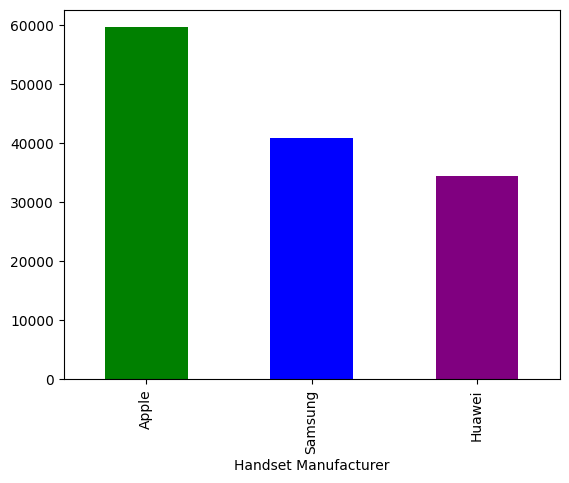

In [23]:
# top 3 handset manufacturers
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
top_manufacturers[:3].plot(kind='bar', color=[ 'green', 'blue','purple'])


#### top 5 handsets per top 3 handset manufacturer

In [27]:
top_handsets_per_manufacturer = {}

for manufacturer in top_manufacturers:
    if manufacturer in df['Handset Manufacturer'].unique():
        manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
        top_handsets = manufacturer_df['Handset Type'].value_counts().head(5)
        top_handsets_per_manufacturer[manufacturer] = top_handsets
    else:
        top_handsets_per_manufacturer[manufacturer] = pd.Series([])

# Step 3: Display the top 5 handsets for each top manufacturer
for manufacturer, top_handsets in top_handsets_per_manufacturer.items():
    print(f"\nTop 5 Handsets for {manufacturer}:")
    print(top_handsets)


Top 5 Handsets for 59565:
Series([], dtype: object)

Top 5 Handsets for 40839:
Series([], dtype: object)

Top 5 Handsets for 34423:
Series([], dtype: object)
